# **Probability Distributions**

In [1]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from scipy.stats import binom, nbinom, bernoulli, poisson, norm, uniform
from numpy.random import geometric
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

# Normal Distribution

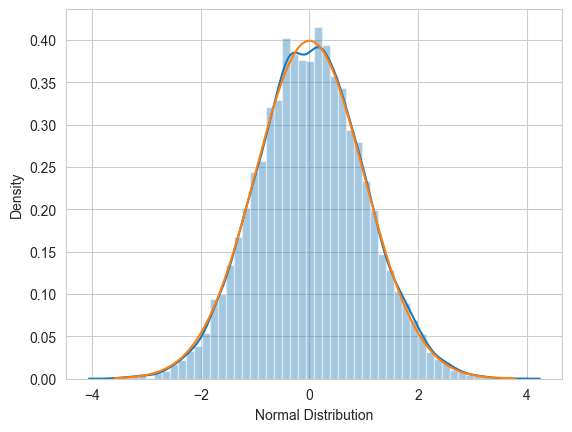

In [28]:
# Plot a normal distribution of size 10000 having mean as 0 and standard deviation as 1.
# generate random numbers from N(0,1)
# .rvs provides random samples; scale = std. deviation, loc = mean, size = no. of samples

mean = 0
std = 1
data_normal = norm.rvs(size=10000,loc= mean,scale= std)
sns.distplot(data_normal)
df_n = pd.DataFrame({'x':data_normal})
df_n['P'] = df_n['x'].apply(lambda v: np.exp(-(((v - mean)/std)**2)/2)/(std*np.sqrt(2*np.pi))) 
df_n = df_n.sort_values(by= 'x')
plt.plot(df_n['x'], df_n['P'], '-')
plt.xlabel('Normal Distribution')
plt.ylabel('Density')
plt.show()

# Binomial Distribution

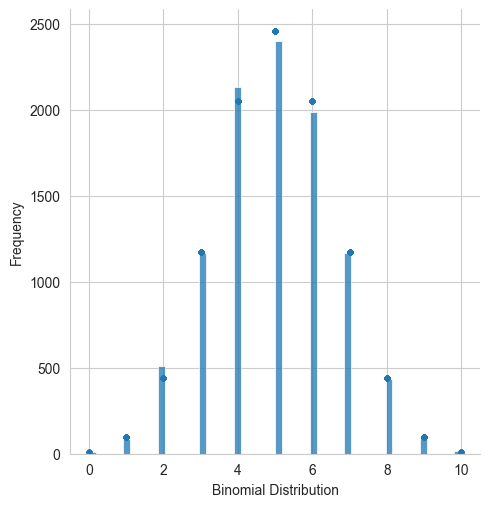

In [36]:
# Consider an event where a fair coin is tossed 10 times and the total number of heads is recorded. 
# Plot the distribution for the event.

p = 1/2    # probability of getting a head
q = 1-p    # probability of getting a tail
n = 10     # total number of trials

data_binom = binom.rvs(n,p,size=10000)
sns.displot(data_binom,kde=False)
df_b = pd.DataFrame({'x': data_binom})
df_b['P'] = df_b['x'].apply(lambda v: (math.factorial(n)/(math.factorial(n-v)*math.factorial(v)))*(p**v)*(q**(n-v)))
plt.plot(df_b['x'],10000*df_b['P'],'.')
plt.xlabel('Binomial Distribution')
plt.ylabel('Frequency')
plt.show()

# Bernoulli Distribution

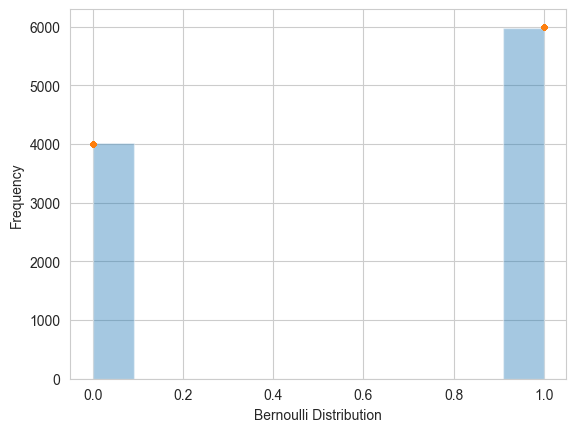

In [37]:
# Consider a random experiment of tossing a biased coin (having the probability of getting a head as 0.6) once. 
# Plot the distribution associated with the event of getting heads in the given experiment if the process is repeated 10000 times.

p=0.6    # probability of getting a head
q=1-p    # probability of getting a tail

data_bern = bernoulli.rvs(p,size=10000)
sns.distplot(data_bern, kde=False)
df_br = pd.DataFrame({'x':data_bern})
df_br['P'] = df_br['x'].apply(lambda v: (p**v)*(q**(1-v)))
plt.plot(df_br['x'], 10000*df_br['P'], '.')
plt.xlabel('Bernoulli Distribution')
plt.ylabel('Frequency')
plt.show()

# Geometric Distribution

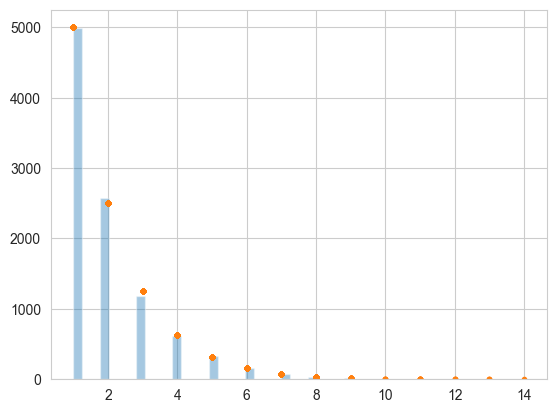

In [51]:
# Plot the geometric distribution of size 10000 having the probability of success as 0.5.

p = 0.5    # probability of success
q = 1-p    # probability of failure

data_geom = geometric(p, 10000)
sns.distplot(data_geom, kde= False)
df_g = pd.DataFrame({'x':data_geom})
df_g['P'] = df_g['x'].apply(lambda v: p*q**(v-1))
plt.plot(df_g['x'], 10000*df_g['P'], '.')
plt.show()

# Poisson Distribution

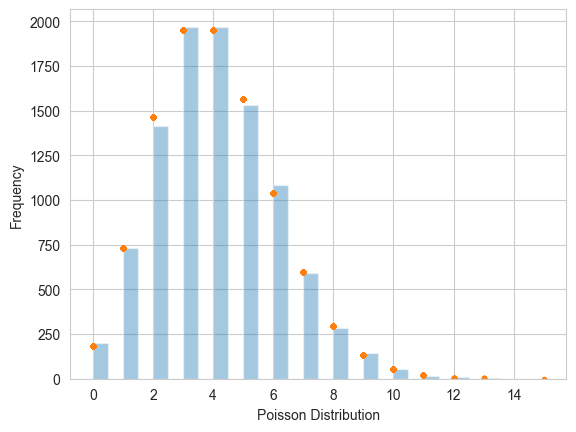

In [55]:
# Plot the poisson distribution having size 10000 and given rate parameter as 4.

rate = 4

data_poisson = poisson.rvs(rate, size=10000)
sns.distplot(data_poisson, bins=30, kde= False)
df_p = pd.DataFrame({'x':data_poisson})
df_p['P'] = df_p['x'].apply(lambda v: (rate**v)*(np.e**(-rate))/math.factorial(v))
plt.plot(df_p['x'], 10000*df_p['P'], '.')
plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.show()

# Uniform Distribution

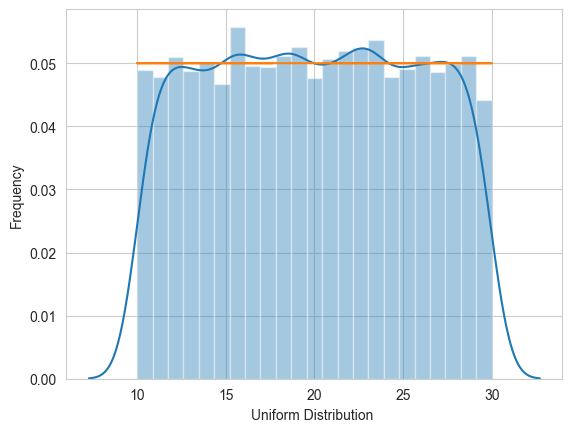

In [58]:
# Plot the uniform distribution of size 10000 over the range {10,30}

n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc = start, scale=width)
sns.distplot(data_uniform)
df_u = pd.DataFrame({'x':data_uniform})
df_u['P'] = df_u['x'].apply(lambda v: 1/(width))
plt.plot(df_u['x'], df_u['P'], '-')
plt.xlabel('Uniform Distribution ')
plt.ylabel('Frequency')
plt.show()

# Central Limit Theorem

Population mean: 4.0
Population standard deviation: 4.0


<Axes: ylabel='Density'>

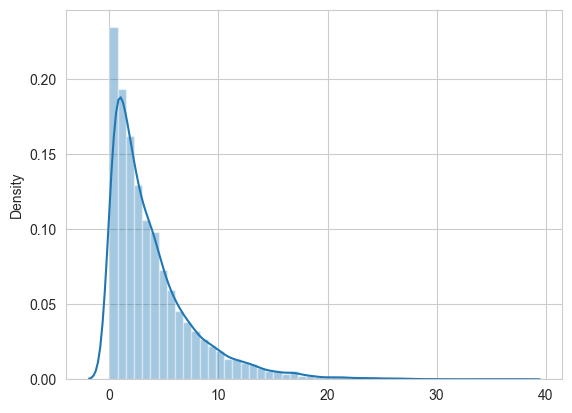

In [59]:
# Let's take a population that is exponentially distributed and check if CLT holds
# Assuming λ=0.25, the mean and standard deviation of the population can be calculated.

rate = 0.25    
mu = 1/rate    
sd = 1/rate    
print('Population mean:', mu)
print('Population standard deviation:', sd)

# It can be seen that the distribution of population is far from the normal distribution.

# Visualize an exponential distribution having size= 10000
data = np.random.exponential((1/rate), 10000)
sns.distplot(data)

In [61]:
# Now let's see how the sampling distribution looks for this population. Consider two cases, i.e. with a small sample size (n= 2), and a large sample size (n=500).

# Case 1: Draw 50 random samples from the population of size 2 each.

# Drawing 50 random samples of size 2 from the exponentially distributed population

sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2'] )

for i in range (1,51):
    exponential_sample = np.random.exponential(mu, sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,6.392648,1.034434,3.584999,3.751463,9.806424,12.019340,1.543402,2.006931,1.286658,0.570413,...,7.097201,0.420355,0.094835,7.197859,2.522995,4.893197,1.062450,3.887343,5.168048,5.552480
x2,3.132545,0.657808,10.874162,6.717729,0.895076,0.352336,5.466579,2.322109,11.432115,6.271935,...,0.428143,0.896918,1.228465,2.086525,5.756019,1.691716,0.784119,0.075254,0.354640,6.427309


<Axes: ylabel='Density'>

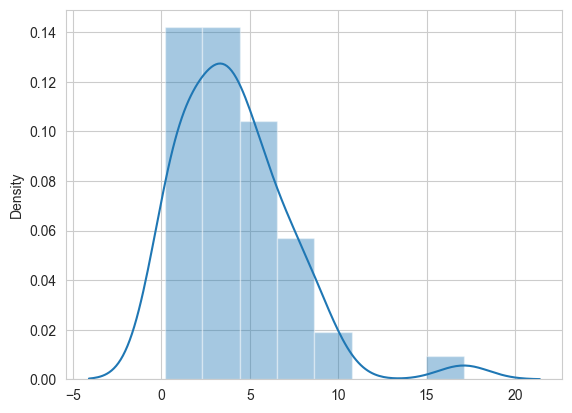

In [64]:
# For each of the 50 samples, the sample mean and its distribution plot is given as

df2_sample_means = df2.mean()
sns.distplot(df2_sample_means)

<Axes: ylabel='Density'>

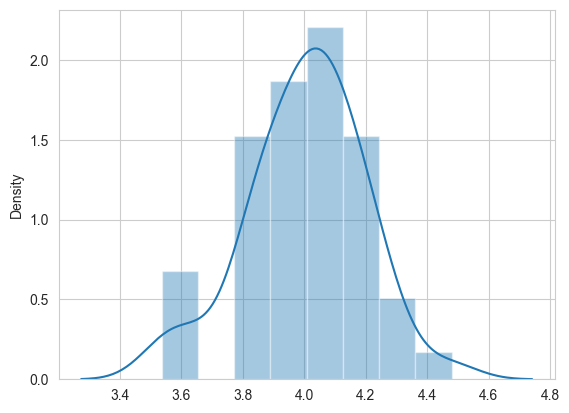

In [ ]:
# Even with a small sample size of 2, the distribution of sample means differs significantly from the original 
# exponential population. While it does not yet resemble a normal distribution closely, it begins to shift away 
# from the exponential shape — forming a crude, early-stage approximation of a bell curve due to the Central Limit Theorem.

# Case 2: Repeat the above process with a much larger sample size (n=500):

# Drawing 50 random samples of size 500

sample_size = 500
df500 = pd.DataFrame()

for i in range (1,51):
    exponential_sample = np.random.exponential(mu, sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means)

In [66]:
# The sampling distribution looks much more like a normal distribution when sampled 
# with a much larger sample size (n=500).

df500_sample_means.head()

,Sample means
sample 1,4.025058
sample 2,3.976830
sample 3,3.864185
sample 4,4.085042
sample 5,3.549300


In [ ]:
# An estimate of the standard deviation of the sampling distribution can be obtained as:
np.std(df500_sample_means).values[0]

Sample means    0.188661
dtype: float64

In [68]:
# The above value is very close to the value stated by the CLT, which is σ/√n:
sd/ np.sqrt(sample_size)

np.float64(0.17888543819998318)

It can be observed that as the sample size increases from 2 to 500, the distribution of sample means increasingly starts resembling a normal distribution, with the mean given by the population mean μ and the standard deviation given by (σ/√n), as stated by the Central Limit Theorem.